## <center>4. Feladatsor</center>

<img src="toohappy.gif" width="700">

1.feladat.  A spline beépített függvény segítségével az $x=0,\ 1,\ 2.5,\ 3.6,\ 5,\ 7,\ 8.1,\ 10$ osztópontokon készítsük el a $\sin(x)$ függvény spline interpoláltját! Ábrázoljuk egy ábrán a két függvényt és lássuk el őket címkével!

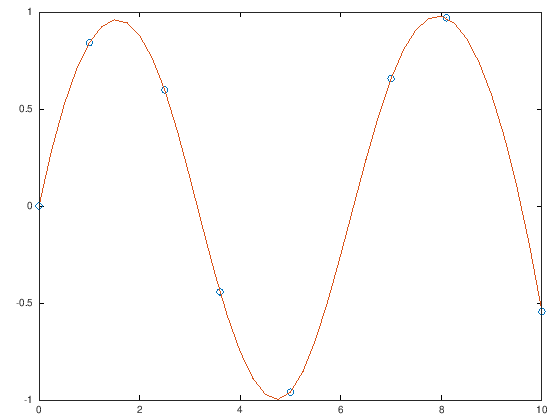

2.feladat. Adjuk meg a megadott $(t_i, f_i)$ pontokat négyzetesen legjobban közelítõ parabolát a Gauss-féle normál-egyenlet segítségével!
<br>
<center>
<table style="width:23%">
  <tr>
    <th>t_i</th>
<td>-2 | -1 | 1 | 2 </td>
  </tr>
  <tr>
    <th>f_i</th>
    <td> 3 | 1 | 0 | 2   </td>
  </tr>
</table>
</center>
<br>
Számítsuk ki a maradékvektor euklideszi hosszának négyzetét!<br>

x =

  -0.16667
  -0.30000
   0.66667

Jnorma =  0.10000


3.feladat. Oldjuk meg az előző feladatot beépített függvények segítségével!

ans =

  -0.16667
  -0.30000
   0.66667



4.feladat. Írjuk legkosebbnegyzetek néven olyan programot, amely megadja a megadott $(t_i, f_i)$ pontokat négyzetesen legjobban közelítõ $n$-edfokú polinomot a Gauss-féle normál-egyenlet segítségével és kiszámíja a maradékvektor euklideszi hosszának négyzetét!

In [21]:
[A,ATranA,ATranf,x,Jnorma,MatlabPolyfit]=legkisebbnegyzetek([-2 -1 1 2],[3 1 0 2],2);
x
Jnorma

x =

  -0.16667
  -0.30000
   0.66667

Jnorma =  0.10000


5.feladat. Írjunk olyan programot, mely az alábbi 

+ $\displaystyle \frac{f(x_0+h)-f(x_0)}{h}$<br>
+ $\displaystyle \frac{f(x_0+h)-f(x_0-h)}{2h}$<br>
+ $\displaystyle \frac{f(x_0+h)-2f(x_0)+f(x_0-h)}{h^2}$<br>

véges differenciahányadokosat kiszámolja adott függvényre, adott pontban és adott lépésközzel. Eredményeinket vessük össze a megfelelő derivált értékekkel!

In [4]:
[elso, elsoketto, masodik] = derivalt(@(x)(sin(x)),0.4,0.1)
cos(0.4)
-sin(0.4)

elso =  0.90007
elsoketto =  0.91953
masodik = -0.38909
ans =  0.92106
ans = -0.38942
